# Transforming Series

Now we apply algebraic transformations for the time series that maintain the equality to the sampled observations in order to assess how each loss function affects. The decomposition in our case is based on applying the following algebraically-equivalent transformations:
$$
f(t) =\sin(0.05t+1) + \varepsilon = \sin(0.05t+1) + \lambda -\lambda+ \varepsilon
$$
where $\lambda$ is some statistic related to the distribution of $\varepsilon$. This allows to define a function $g(t)=\sin(0.05t+1) + \lambda$ and a demeaned random variable $x=\varepsilon-\lambda$, so that:
$$
f(t) = \sin(0.05t+1) + \varepsilon = \sin(0.05t+1) + \lambda -\lambda+ \varepsilon = g(t) + x
$$

Before proceeding, we import the necessary modules and packages:

In [1]:
# Own Modules

from src.ErrorModelling4TS.ts_simulator.distributions import *
from src.ErrorModelling4TS.ts_simulator.simulator import *
from src.ErrorModelling4TS.ts_simulator.utils import *
from src.ErrorModelling4TS.graphics.classes import *
from src.ErrorModelling4TS.graphics.utils import *
from project_utils import *

# Other modules

import numpy as np
import pandas as pd

Now, if we consider $\lambda=\mu_\varepsilon$, where $\mu_\varepsilon=\mathbb{E}(\varepsilon)$, then we can define a function $a(t)=\sin(0.05t+1)+\mu_\varepsilon$ and $x_a = \varepsilon - \mu_\varepsilon$:
$$
f(t) = \sin(0.05t+1) + \varepsilon = \sin(0.05t+1) + \mu_\varepsilon -\mu_\varepsilon + \varepsilon = a(t) + x_a
$$

Moreover, if we consider $\lambda=q^{0.5}_\varepsilon$, where $q^{0.5}_\varepsilon$ is the median of the distribution of $\varepsilon$, then we can define a function $b(t)=\sin(0.05t+1)+q^{0.5}_\varepsilon$ and $x_b = \varepsilon - q^{0.5}_\varepsilon$:
$$
f(t) = \sin(0.05t+1) + \varepsilon = \sin(0.05t+1) + q^{0.5}_\varepsilon -q^{0.5}_\varepsilon + \varepsilon = b(t) + x_b
$$

Hence, we will try different distributions for the errors.

### Gumbel

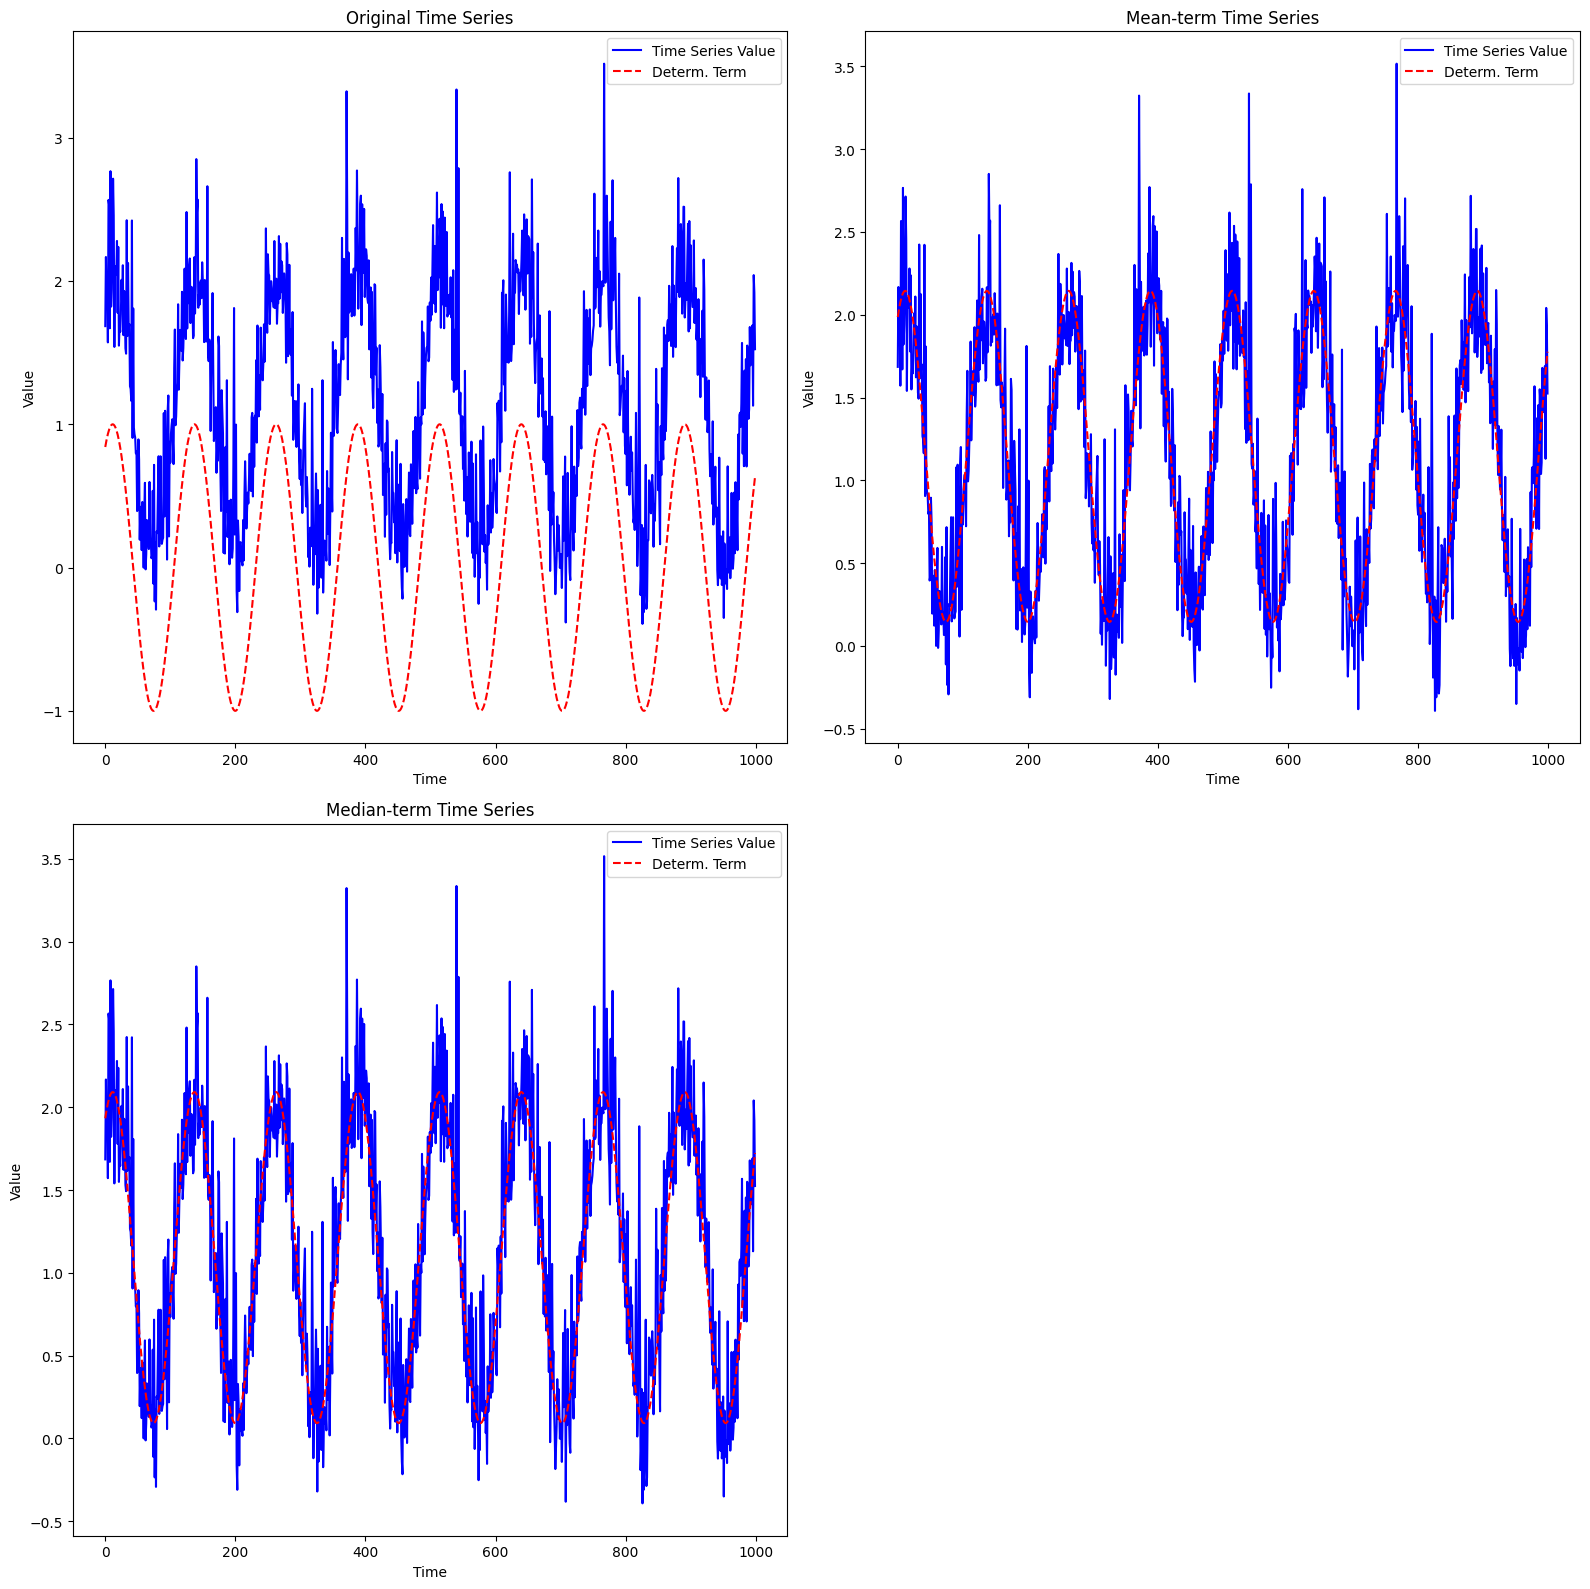

In [2]:
n = 1000
params = {"A": 1, "B":0.05, "C":1}
var = GumbelDist({"loc": 1, "scale":0.25})
theory = var.theory()

simul = TimeSeriesSimulator()

det_series = pd.DataFrame(sinForm(params=params, x=range(0, n)), index=range(0, n), columns=["Determ"])
noise_series = pd.DataFrame(simul.simulate_noise(n=n, dist=var, seed=12), index=range(0, n), columns=["Noise"])

ts_series = simul.get_ts(determ_series=det_series, noise_series=noise_series, constant_determ=0,constant_noise=0)
ts_series_mean = simul.get_ts(determ_series=det_series, noise_series=noise_series, constant_determ=theory["mean"],constant_noise=-theory["mean"])
ts_series_median = simul.get_ts(determ_series=det_series, noise_series=noise_series, constant_determ=theory["median"],constant_noise=-theory["median"])

list_series = [ts_series,ts_series_mean,ts_series_median]

plotter = PlotSimulatedTS()
plt_original = plotter.plot_sim_ts(ts_series, errors = None)
plt_mean = plotter.plot_sim_ts(ts_series_mean)
plt_median = plotter.plot_sim_ts(ts_series_median)

show_figs_grid([plt_original, plt_mean, plt_median],titles=["Original Time Series","Mean-term Time Series","Median-term Time Series"])

Now, we create some functions and dictionaries before training our models:

In [3]:
loss_functions = {
    "L1": "mae",
    "L2": "mse",
    "Huber": keras.losses.Huber(delta=0.5)
}

seq_length = 10
batch_size = 16
epochs = 50
learning_rate = 0.01

Finally, we train our models for different series and loss functions through a loop:

In [4]:
results_df, predictions_dict = train_and_evaluate(list_series,get_series_transform)


Processing Series 1...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step

Processing Series 2...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step

Processing Series 3...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step


The results are printed here:

In [5]:
print(results_df)

     Series Loss Function       MAE        MAPE     MedAE       MSE      RMSE  \
0  Original            L1  0.243758  164.979146  0.187030  0.108812  0.329866   
1  Original            L2  0.255308  165.152365  0.218490  0.107407  0.327730   
2  Original         Huber  0.242425  133.166516  0.187697  0.109524  0.330945   
3      Mean            L1  0.257834  204.434126  0.207193  0.116481  0.341294   
4      Mean            L2  0.250076  155.629217  0.200472  0.110911  0.333032   
5      Mean         Huber  0.246992  196.995316  0.199712  0.106711  0.326666   
6    Median            L1  0.249701  206.335266  0.188696  0.112782  0.335831   
7    Median            L2  0.251131  186.786524  0.213357  0.104810  0.323744   
8    Median         Huber  0.248030  229.915097  0.206750  0.105168  0.324297   

         R2  
0  0.812845  
1  0.815262  
2  0.811620  
3  0.799654  
4  0.809235  
5  0.816459  
6  0.806016  
7  0.819728  
8  0.819112  


The original model (no adjustments to the deterministic term) consistently performs better than the mean-adjusted and median-adjusted models in terms of lower MAE, MSE, and RMSE. The median-adjusted model shows a slight improvement over the mean-adjusted model in some cases, particularly under the L2 loss function. The median adjustment performs better under L2 and Huber loss (lower RMSE and MSE than the mean-adjusted case).This suggests that shifting by the mean increases the absolute deviation of errors compared to shifting by the median.

Adjusting by the mean shifts the deterministic component too much, making it less effective at capturing patterns. The median is a better robust statistic because it reduces the influence of extreme values in the asymmetric Gumbel-distributed noise.

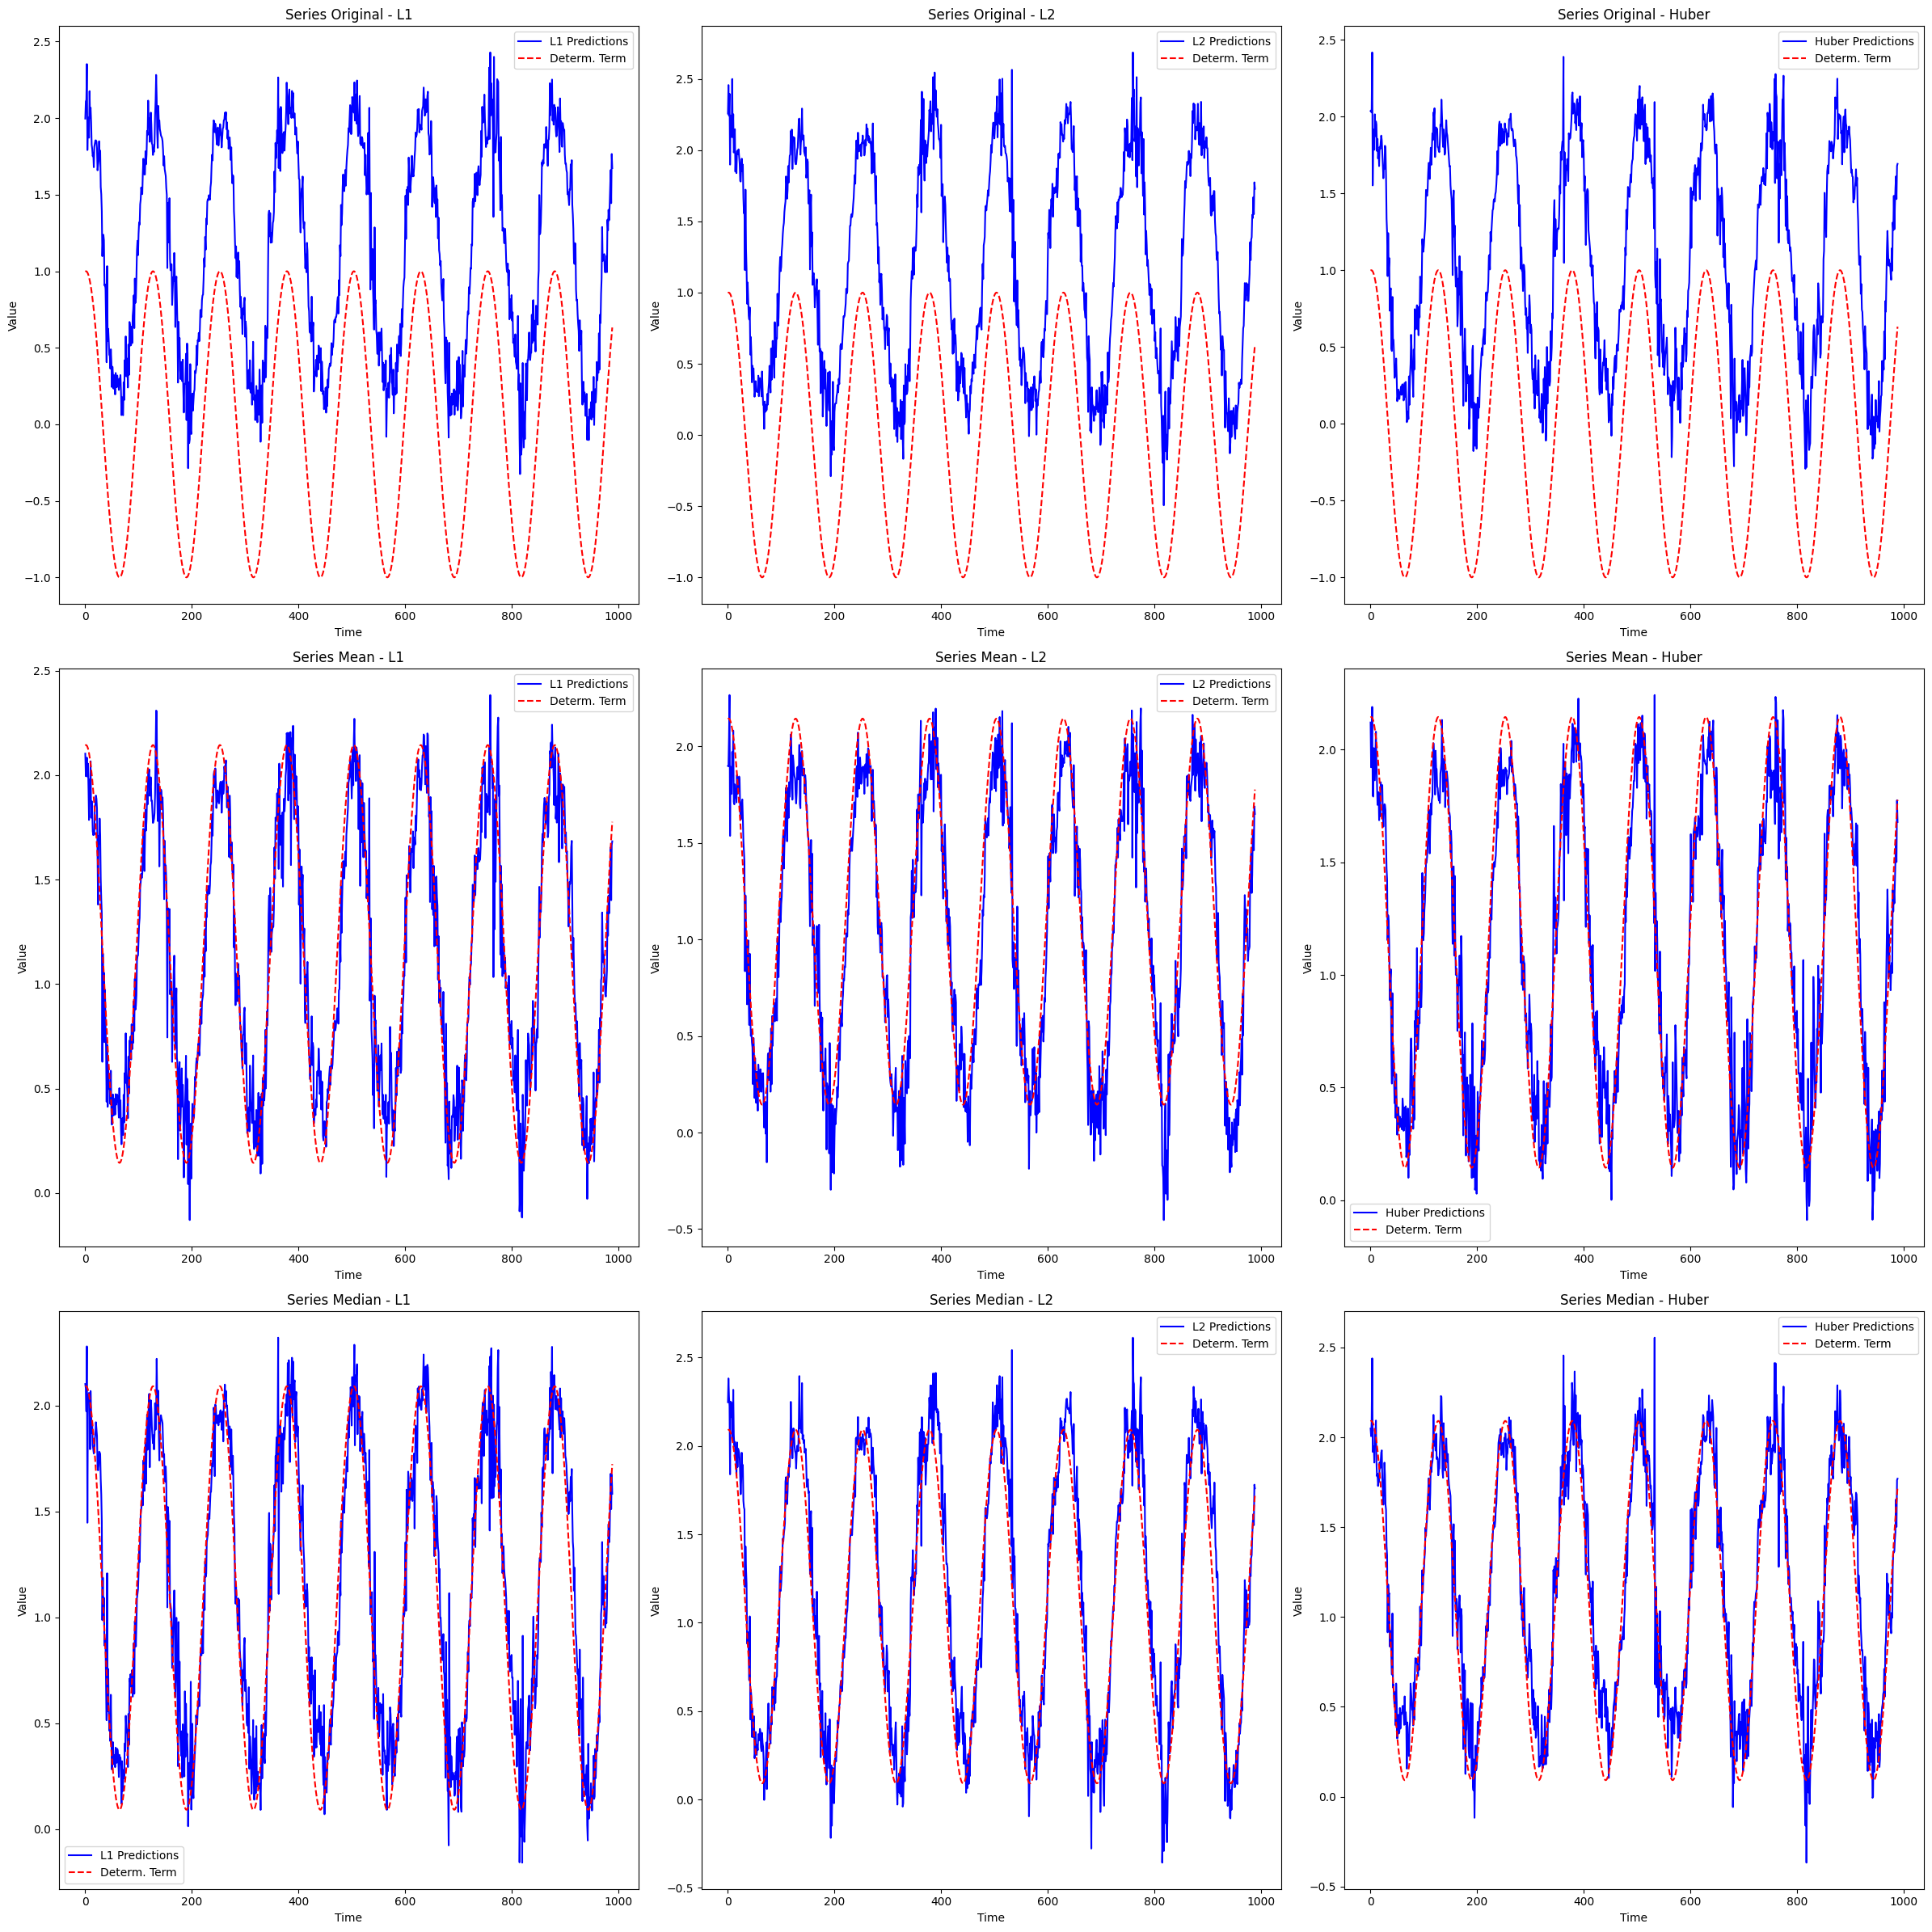

In [6]:
generate_prediction_plots(list_series, predictions_dict, loss_functions, plotter, show_figs_grid, get_series_transform)


### Log-normal

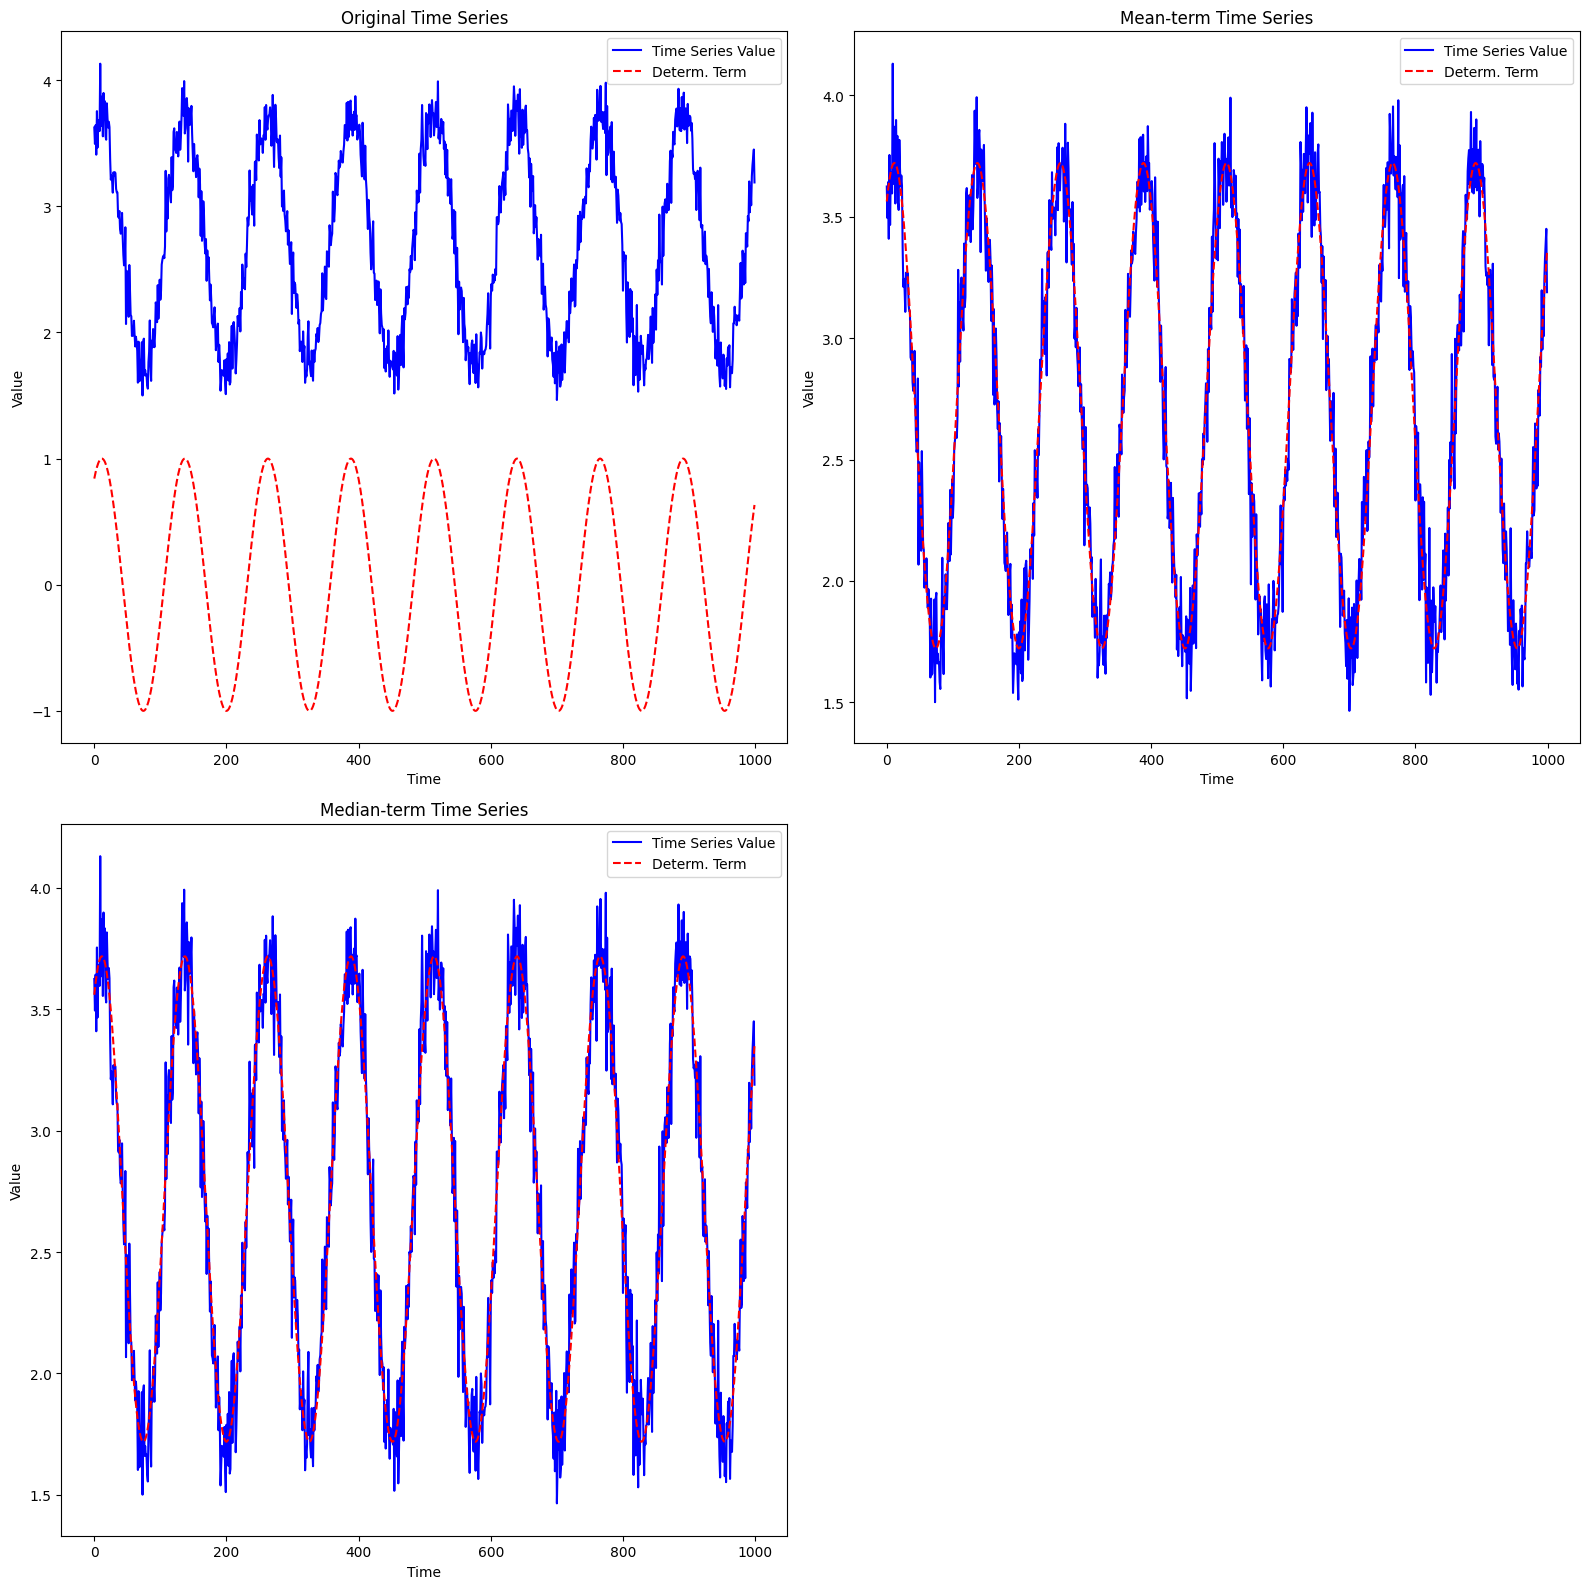

In [7]:
n = 1000
params = {"A": 1, "B":0.05, "C":1}
var = LogNormalDist({"loc": 1, "scale":0.05})
theory = var.theory()

simul = TimeSeriesSimulator()

det_series = pd.DataFrame(sinForm(params=params, x=range(0, n)), index=range(0, n), columns=["Determ"])
noise_series = pd.DataFrame(simul.simulate_noise(n=n, dist=var, seed=12), index=range(0, n), columns=["Noise"])

ts_series = simul.get_ts(determ_series=det_series, noise_series=noise_series, constant_determ=0,constant_noise=0)
ts_series_mean = simul.get_ts(determ_series=det_series, noise_series=noise_series, constant_determ=theory["mean"],constant_noise=-theory["mean"])
ts_series_median = simul.get_ts(determ_series=det_series, noise_series=noise_series, constant_determ=theory["median"],constant_noise=-theory["median"])

list_series = [ts_series,ts_series_mean,ts_series_median]

plotter = PlotSimulatedTS()
plt_original = plotter.plot_sim_ts(ts_series, errors = None)
plt_mean = plotter.plot_sim_ts(ts_series_mean)
plt_median = plotter.plot_sim_ts(ts_series_median)

show_figs_grid([plt_original, plt_mean, plt_median],titles=["Original Time Series","Mean-term Time Series","Median-term Time Series"])

Now, we create some functions and dictionaries before training our models:

In [8]:
loss_functions = {
    "L1": "mae",
    "L2": "mse",
    "Huber": keras.losses.Huber(delta=0.5)
}

seq_length = 10
batch_size = 16
epochs = 50
learning_rate = 0.01

Finally, we train our models for different series and loss functions through a loop:

In [9]:
results_df, predictions_dict = train_and_evaluate(list_series,get_series_transform)


Processing Series 1...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step

Processing Series 2...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step

Processing Series 3...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


In [10]:
print(results_df)

     Series Loss Function       MAE      MAPE     MedAE       MSE      RMSE  \
0  Original            L1  0.131971  5.185880  0.108393  0.028236  0.168037   
1  Original            L2  0.131088  5.154720  0.109354  0.026985  0.164271   
2  Original         Huber  0.132623  5.497327  0.114409  0.027111  0.164655   
3      Mean            L1  0.124370  4.960305  0.104876  0.024258  0.155750   
4      Mean            L2  0.125834  5.016720  0.105459  0.025145  0.158573   
5      Mean         Huber  0.128919  5.118108  0.113132  0.025211  0.158779   
6    Median            L1  0.127382  5.209371  0.107089  0.025535  0.159798   
7    Median            L2  0.126023  5.113651  0.110735  0.024454  0.156379   
8    Median         Huber  0.123029  4.927060  0.106415  0.023247  0.152470   

         R2  
0  0.945380  
1  0.947801  
2  0.947557  
3  0.953075  
4  0.951359  
5  0.951233  
6  0.950605  
7  0.952696  
8  0.955031  


The Mean-adjusted and Median-adjusted models outperform the Original model in most cases. The Median-adjusted model performs slightly better than the Mean-adjusted model. Compared to the Gumbel case, the adjustment improved the performance rather than degrading it. With lognormal errors, adjusting by the mean or median improves performance because lognormal distribution is positively skewed, meaning the mean is higher than the median and adjusting the deterministic component reduces systematic bias introduced by the skewness.

For Gumbel, the adjustment was unnecessary (it caused a shift that worsened performance), but for lognormal, the shift helps correct bias. Median performs slightly better than mean because it is more robust to the extreme right tail.

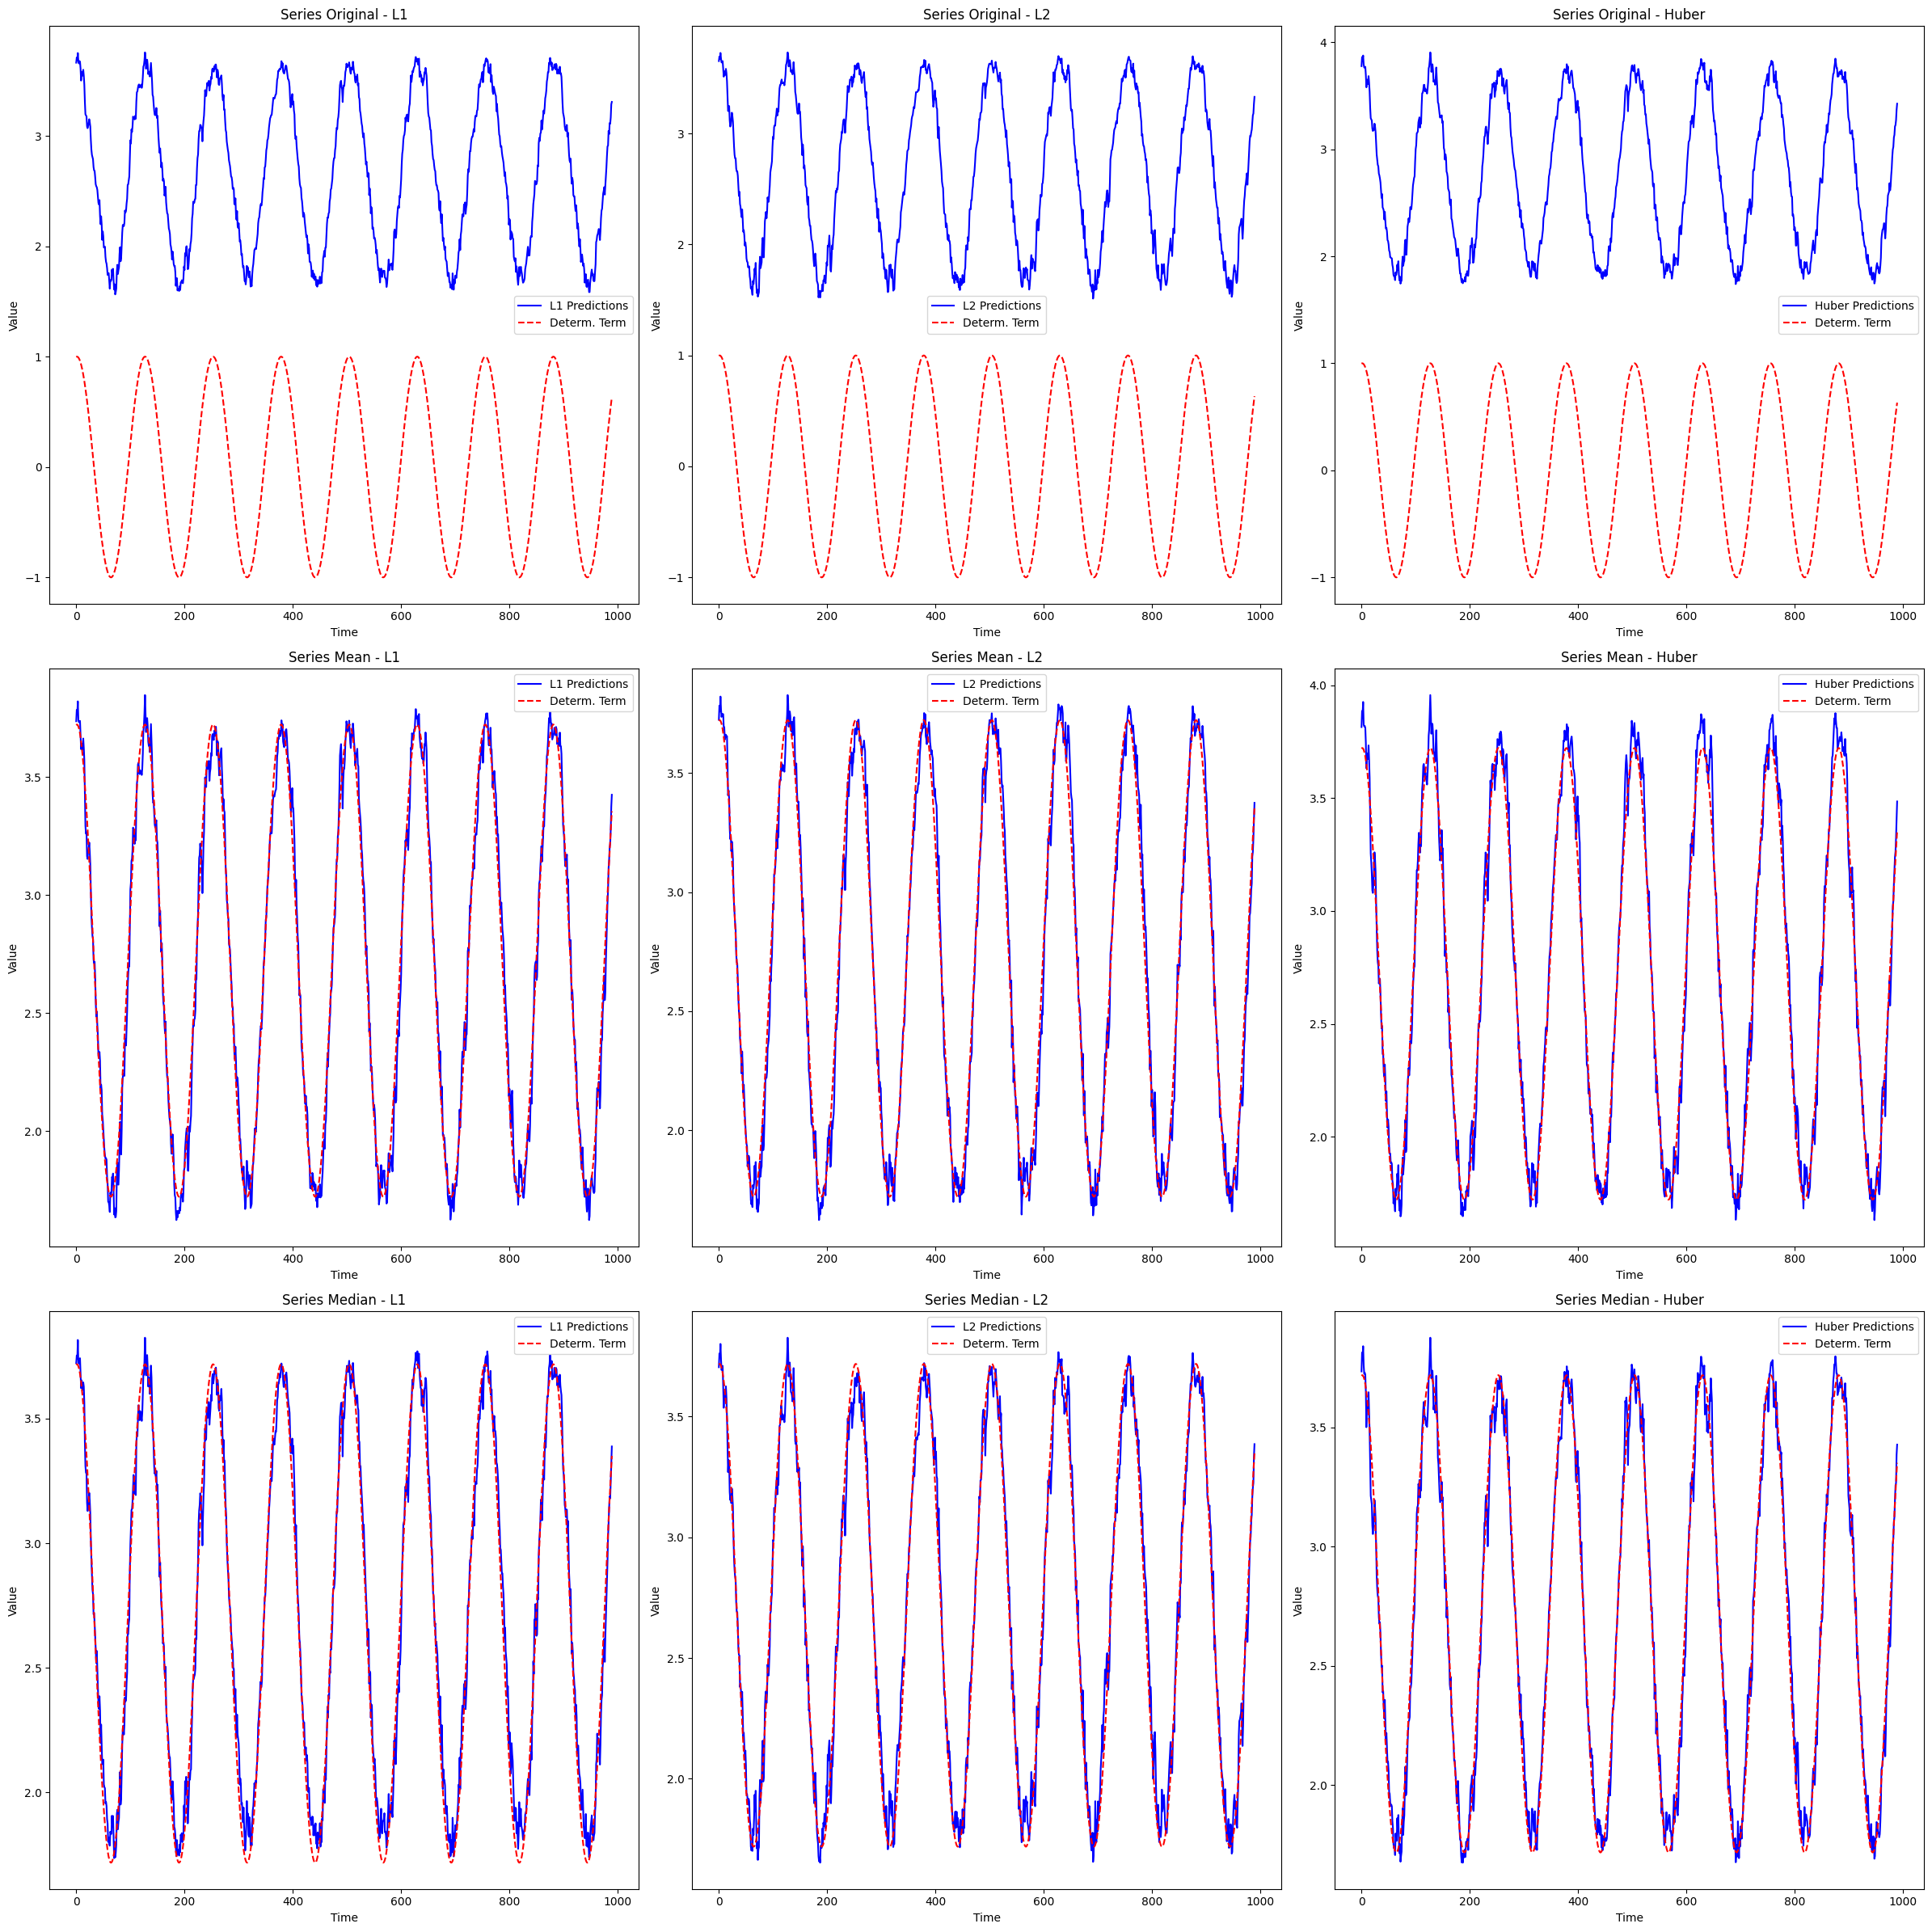

In [12]:
generate_prediction_plots(list_series, predictions_dict, loss_functions, plotter, show_figs_grid, get_series_transform)
